### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
tf.reset_default_graph()
tf.random.set_seed(42)
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#### Collect Fashion mnist data from tf.keras.datasets 

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print("No. of sample in x_train: ", x_train.shape[0])
print("No. of sample in x_test: ",x_test.shape[0])

No. of sample in x_train:  60000
No. of sample in x_test:  10000


In [31]:
y_train.shape

(60000,)

In [32]:
y_test.shape

(10000,)

#### Change train and test labels into one-hot vectors

In [6]:
y_train_OH = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_OH = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Train and Test lables are coverted to One-Hot vectors")

Train and Test lables are coverted to One-Hot vectors


In [29]:
y_train_OH.shape

(60000, 10)

In [30]:
y_test_OH.shape

(10000, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
# Import the necessary layers from keras to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Dense 1st layer
model.add(Dense(200, activation='relu'))

#Dense 2nt layer
model.add(Dense(100, activation='relu'))

#Add dropout layer with p = 0.25
model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Output layer
model.add(Dense(10, activation='softmax'))

###Compile the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Train the model

In [24]:
#Train the model
model.fit(x_train,y_train_OH, validation_data=(x_test,y_test_OH), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.5098 - accuracy: 0.8175 - val_loss: 0.4170 - val_accuracy: 0.8482
Epoch 2/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3976 - accuracy: 0.8552 - val_loss: 0.3655 - val_accuracy: 0.8670
Epoch 3/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3606 - accuracy: 0.8674 - val_loss: 0.3617 - val_accuracy: 0.8688
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3385 - accuracy: 0.8763 - val_loss: 0.3727 - val_accuracy: 0.8718
Epoch 5/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3149 - accuracy: 0.8850 - val_loss: 0.3696 - val_accuracy: 0.8779
Epoch 6/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3012 - accuracy: 0.8887 - val_loss: 0.3922 - val_accuracy: 0.8750
Epoch 7/10
60000/60000 [==========================

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

In [26]:
model.evaluate(x_test,y_test_OH)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3704 - accuracy: 0.8883


[0.3703908061742783, 0.8883]

In [27]:
print ("Final Train Accuracy from model history: ", model.history.history['accuracy'][-1])
print ("Final Test Accuracy from model history: ", model.history.history['val_accuracy'][-1])

Final Train Accuracy from model history:  0.90328336
Final Test Accuracy from model history:  0.8883


##Summary
- The final test/validation accuracy of the DNN using Keras with RELU as an activation function, ADAM as optimiser, with 2 dense layer along with dropout layer p=0.25, loss = categorical_crossentropy, assumed epochs=10 & batch_size=32  is 88.83% with a training accuracy of 90.33%

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


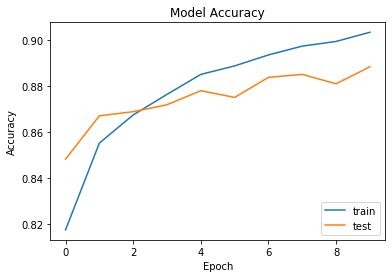

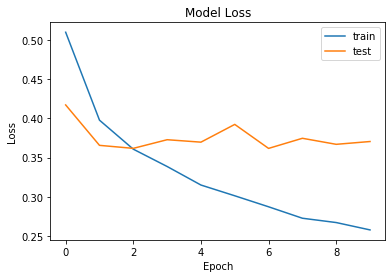

In [28]:
import matplotlib.pyplot as plt

# list all data in history
print(model.history.history.keys())

# Summary - History for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summary - History for loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();